
# "The death of one man is a TRAGEDY, The death of millions is a STATISTIC." –                    Josef Stalin


![img](https://www.wrbl.com/wp-content/uploads/sites/24/2021/05/AP21147394248908.jpg?w=2560&h=1440&crop=1)
wrbl.com

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df=pd.read_csv("../input/palestine-body-count/Palestine Body Count.csv")

/kaggle/input/palestine-body-count/Palestine Body Count.csv


# Descriptive Analysis And Preprocessing

In [2]:
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed
0,2000.0,DECEMBER,781,NaN,51,8
1,2000.0,NOVEMBER,3838,NaN,112,22
2,2000.0,OCTOBER,5984,NaN,104,10
3,2000.0,SEPTEMBER,NaN,NaN,16,1
4,2001.0,DECEMBER,304,NaN,67,36
...,...,...,...,...,...,...
246,2021.0,MARCH,NaN,NaN,4,0
247,2021.0,APRIL,NaN,NaN,1,0
248,2021.0,MAY,NaN,NaN,26,3
249,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df=df.iloc[0:249]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    float64
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  195 non-null    object 
 3   Israelis Injuries      132 non-null    object 
 4   Palestinians Killed    249 non-null    object 
 5   Israelis Killed        249 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.8+ KB


In [5]:
df.describe()

,Year
count,249.000000
mean,2010.542169
std,6.014702
min,2000.000000
25%,2005.000000
50%,2011.000000
75%,2016.000000
max,2021.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   249 non-null    float64
 1   Month                  249 non-null    object 
 2   Palestinians Injuries  195 non-null    object 
 3   Israelis Injuries      132 non-null    object 
 4   Palestinians Killed    249 non-null    object 
 5   Israelis Killed        249 non-null    object 
dtypes: float64(1), object(5)
memory usage: 11.8+ KB


In [7]:
df.fillna(value=0,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4468: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [8]:
df["Palestinians Injuries"].iloc[165]=0
df["Israelis Injuries"].iloc[165]=0
df["Palestinians Injuries"].iloc[203]=0
df["Israelis Injuries"].iloc[203]=0
df["Month"].iloc[203]="MAY"
df["Month"].iloc[227]="MAY"
df["Month"].iloc[239]="MAY"

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [9]:
df["Year"]=df["Year"].apply(int)
df["Palestinians Killed"]=df["Palestinians Killed"].apply(int)
df["Israelis Killed"]=df["Israelis Killed"].apply(int)
df["Israelis Injuries"] = df["Israelis Injuries"].apply(int)
df["Palestinians Injuries"] = df["Palestinians Injuries"].apply(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [10]:
df["Palestinian Casualties"]=(df["Palestinians Killed"]+df["Palestinians Injuries"])
df["Israelis Casualties"]=(df["Israelis Killed"]+df["Israelis Injuries"])
df["Total Casualties"]=(df["Palestinian Casualties"]+df["Israelis Casualties"])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [11]:
df

,Year,Month,Palestinians Injuries,Israelis Injuries,Palestinians Killed,Israelis Killed,Palestinian Casualties,Israelis Casualties,Total Casualties
0,2000,DECEMBER,781,0,51,8,832,8,840
1,2000,NOVEMBER,3838,0,112,22,3950,22,3972
2,2000,OCTOBER,5984,0,104,10,6088,10,6098
3,2000,SEPTEMBER,0,0,16,1,16,1,17
4,2001,DECEMBER,304,0,67,36,371,36,407
...,...,...,...,...,...,...,...,...,...
244,2021,JANUARY,0,0,4,0,4,0,4
245,2021,FEBRUARY,0,0,1,0,1,0,1
246,2021,MARCH,0,0,4,0,4,0,4
247,2021,APRIL,0,0,1,0,1,0,1


# Year On Year Analysis Of Deaths And Injuries

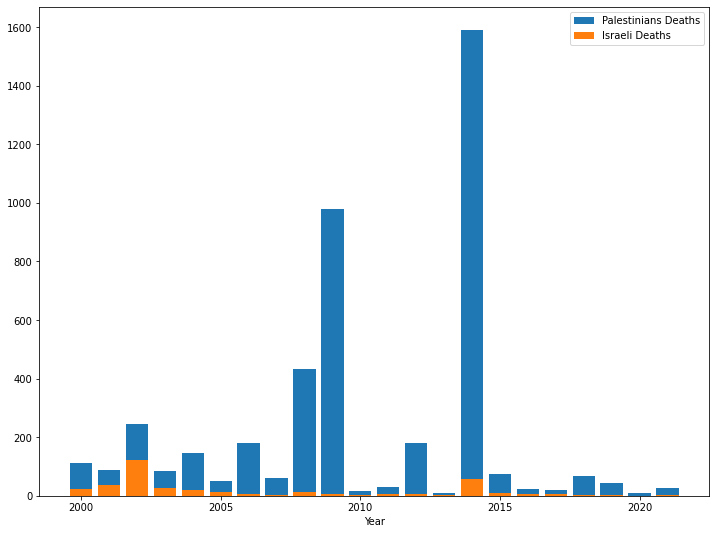

In [12]:
plt.figure(figsize=(12,9))
plt.bar(df['Year'],df['Palestinians Killed'] , label = "Palestinians Deaths" ) 
plt.bar(df['Year'],df['Israelis Killed'] , label = "Israeli Deaths")
plt.xlabel('Year')
plt.legend()
plt.show()

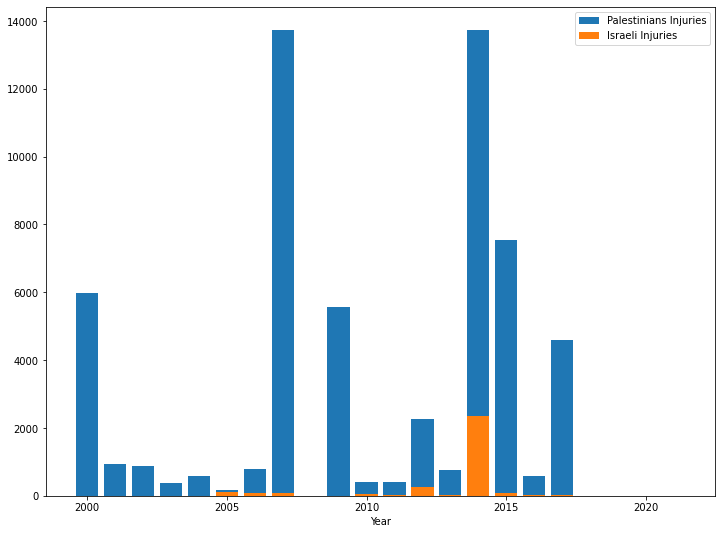

In [13]:
plt.figure(figsize=(12,9))
plt.bar(df['Year'],df['Palestinians Injuries'] , label = "Palestinians Injuries" ) 
plt.bar(df['Year'],df['Israelis Injuries'] , label = "Israeli Injuries")
plt.xlabel('Year')
plt.legend()
plt.show()

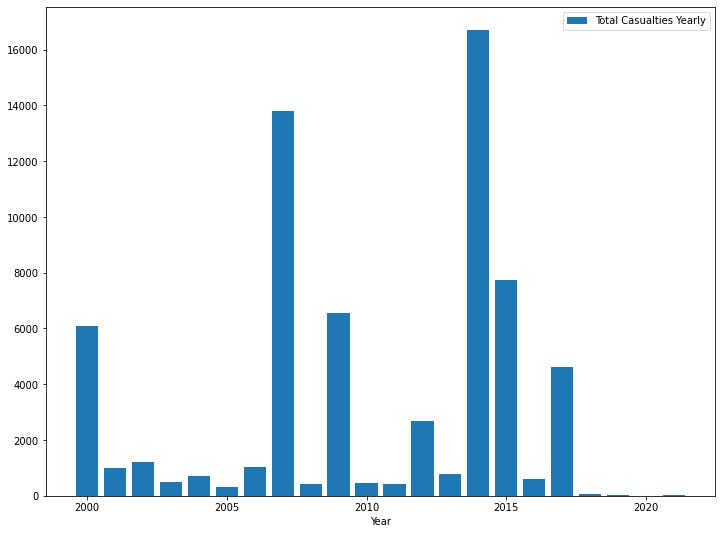

In [14]:
plt.figure(figsize=(12,9))
plt.bar(df['Year'],df['Total Casualties'] , label = "Total Casualties Yearly" ) 
plt.xlabel('Year')
plt.legend()
plt.show()

## Important Inferences
* **Year 2007**- This Year Saw The Famous **Battle Of Gaza** Between Hamas And Fatah Groups For The Control Of Gaza Strip. This Was Not A War Involving Israeli Security Agencies. The Palestinian Casualties Were Far Higher Than Israeli Ones Because It Was A War Between Two Palestinian Groups.
* **Year 2014**- This Year Gaza Was Invaded By Israeli Soldiers. Israeli Shelling Displaced 3300 People. Moreover, Many Minor And Major Conflicts On Both Sides Led To Heavy Casualties. This Was Also The Year When Highest Israeli Casualties Were Observed.

# Month-Wise Analysis Of Deaths And Injuries

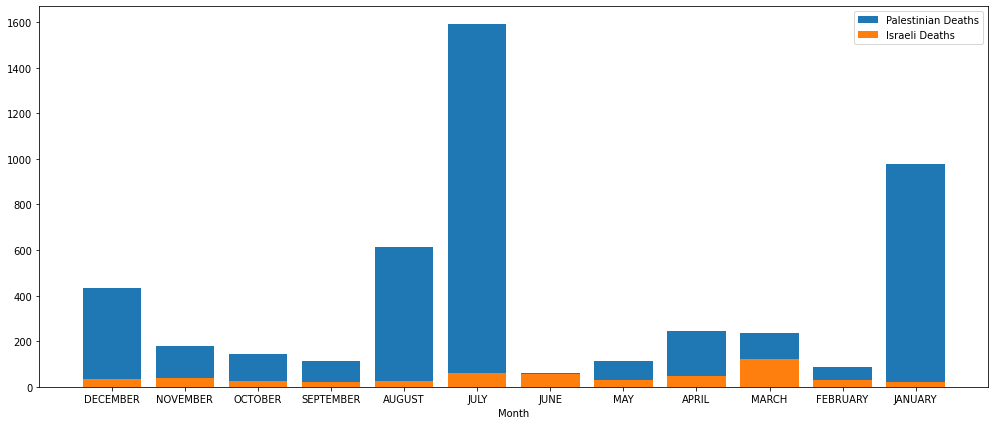

In [15]:
plt.figure(figsize=(17,7))
plt.bar(df['Month'],df['Palestinians Killed'] , label = "Palestinian Deaths" ) 
plt.bar(df['Month'],df['Israelis Killed'] , label = "Israeli Deaths")
plt.xlabel('Month')
plt.legend()
plt.show()

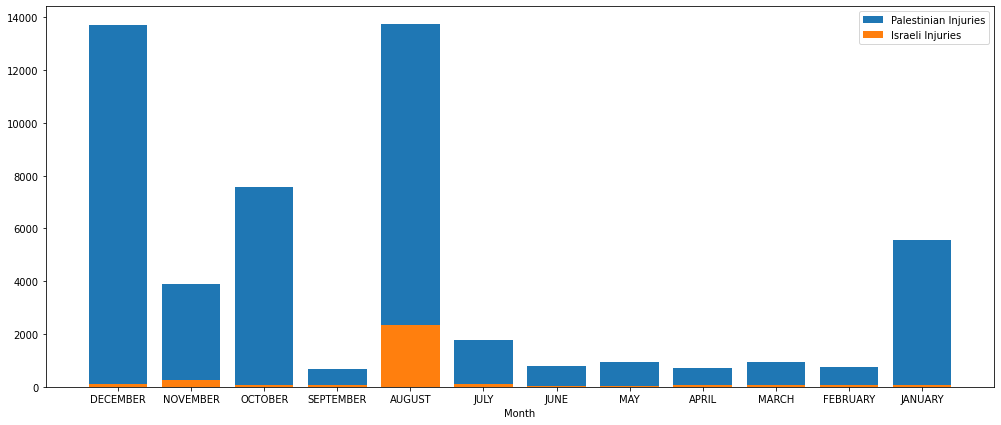

In [16]:
plt.figure(figsize=(17,7))
plt.bar(df['Month'],df['Palestinians Injuries'] , label = "Palestinian Injuries" ) 
plt.bar(df['Month'],df['Israelis Injuries'] , label = "Israeli Injuries")
plt.xlabel('Month')
plt.legend()
plt.show()

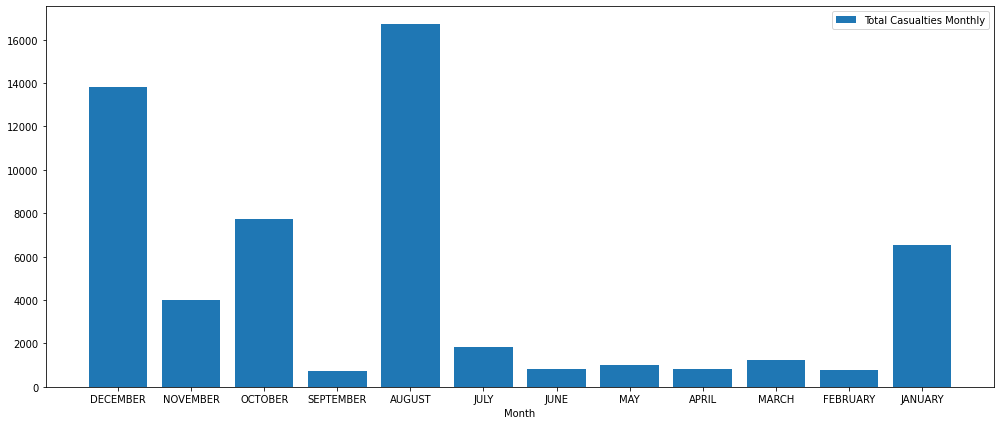

In [17]:
plt.figure(figsize=(17,7))
plt.bar(df['Month'],df['Total Casualties'] , label = "Total Casualties Monthly" ) 
plt.xlabel('Month')
plt.legend()
plt.show()

# “We must live together as brothers or perish together as fools.”
#             ― Martin Luther King Jr

In [18]:
df["Total Casualties"].sum()

127910

## The **Cost Of War** Is 127910 And It's Increasing At A Compounded Rate. 

That's about 1.5% Population Of Whole Israel

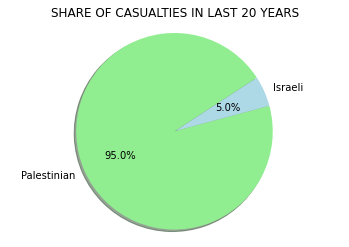

In [19]:
lis1=[df["Israelis Casualties"].sum(),df["Palestinian Casualties"].sum()]
my_data = lis1
my_labels = ['Israeli','Palestinian']

plt.pie(my_data,labels=my_labels,autopct='%1.1f%%',startangle=15, shadow = True,colors=['lightblue','lightgreen'])
plt.title('SHARE OF CASUALTIES IN LAST 20 YEARS')
plt.axis('equal')
plt.show()

The Data Clearly Shows That Palestinians Have Lost Much More Due To Warfare With Israel, Infighting Within Groups And Other Conflicts. 

# Countries Need To Look At MiddleEast And Try To Sort The Mess Out